In [15]:
!pip install vaderSentiment

    100% |████████████████████████████████| 133kB 4.5MB/s ta 0:00:01


In [78]:
import textblob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.rcParams['figure.figsize'] = [20, 20]

In [151]:
plt.rcParams['figure.figsize'] = [20, 20]

# Read tweets csv
df = pd.read_csv("../../data/Tweets3Weeks.csv")

# Drop all-null rows if any
df.dropna(how='all', inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

/Users/ateendraramesh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,8,18,23,24,26,27,29,31,40,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [152]:
# Vader sentiment
vader = SentimentIntensityAnalyzer()

In [173]:
def clean_df(df):
    """
    Input: A df of tweets
    Returns: A df that cleans the input 
             df and returns it.
    """
    rows_to_drop = []
    for i in range(len(df)):
        curr_row = df.iloc[i]
        if (pd.isna(curr_row['full_text'])) or pd.isna(curr_row['created_at']) or not str(curr_row['created_at']).endswith("2019"):
            rows_to_drop.append(i)
    print ("Dropping", len(rows_to_drop), "rows!")
    if len(rows_to_drop) == 0:
        return df
    return df.drop(rows_to_drop)
        
def add_sentiment_to_df(df):
    # Sentiment values
    neg, pos, neu, compound = [], [], [], []
    
    # Failed entries for debugging laters
    failed = []
    for i, text in enumerate(df['full_text']):
        try:
            sentiment_dict = vader.polarity_scores(text)
            neg.append(sentiment_dict['neg'])
            neu.append(sentiment_dict['neu'])
            pos.append(sentiment_dict['pos'])
            compound.append(sentiment_dict['compound'])     
        except:
            failed.append(i)
    assert(len(failed) == 0)
    df['neg'] = neg
    df['neu'] = neu
    df['pos'] = pos
    df['compound'] = compound
    return df

In [174]:
df = clean_df(df)
df = add_sentiment_to_df(df)

Dropping 0 rows!


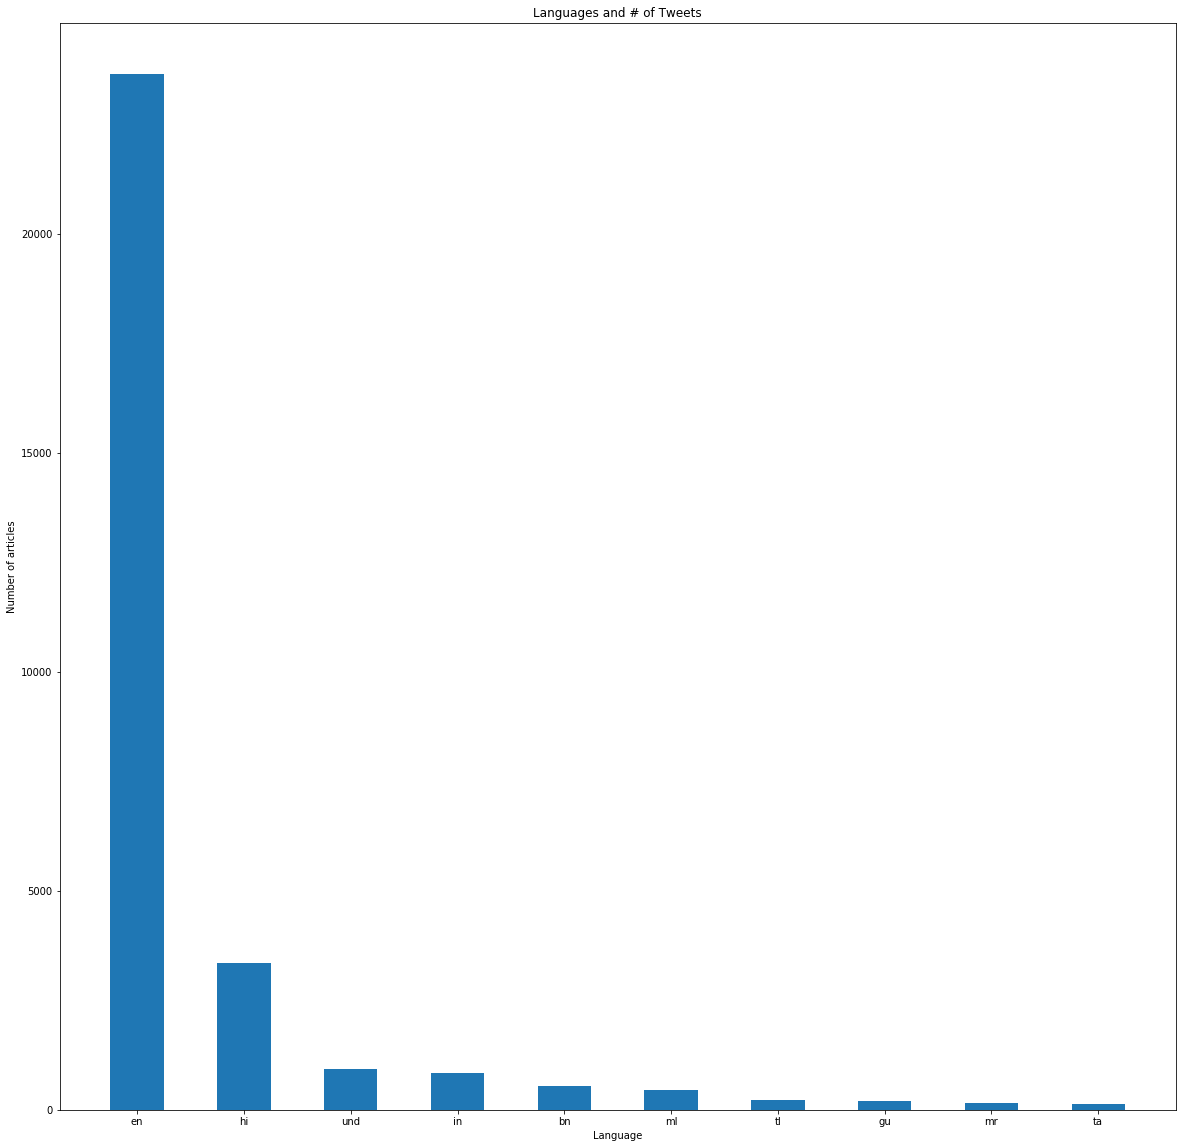

In [175]:
lang_count = Counter(df['lang'])
del lang_count['<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>']
lang_count = sorted(lang_count.items(), key=lambda x: -x[1])

counter = np.array(lang_count)[:10]
places, counts = counter[:, 0].tolist(), counter[:, 1].astype(np.float32)
indices = np.arange(len(counts))
width = 1

plt.xlabel("Language")
plt.ylabel("Number of articles")
plt.interactive(True)

plt.xticks(indices, places)
plt.title("Languages and # of Tweets")
_ = plt.bar(indices, counts, 0.5)

In [179]:
df['created_at'] = pd.to_datetime(df['created_at'])
# Sort by time created
df.sort_values(by=['created_at'], inplace=True)

In [180]:
df.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,userfavourites_count,userverified,userstatuses_count,userfollowing,userfollow_request_sent,usercontributors_enabled,neg,neu,pos,compound
8468,NaN,NaN,2019-02-23 05:35:52,"[14, 184]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1.0,False,@OmarAbdullah Fake news . You are just spreadi...,NaN,...,12185.0,False,14069.0,NaN,NaN,False,0.187,0.813,0.000,-0.7351
8456,NaN,NaN,2019-02-23 05:45:40,"[0, 247]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1099183468586532865, 'id_str...",1.0,False,We had a fruitful discussion on 06.02.2019 wit...,NaN,...,15.0,False,301.0,NaN,NaN,False,0.000,1.000,0.000,0.0000
8481,NaN,NaN,2019-02-23 06:23:47,"[0, 209]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1099193063925149696, 'id_str...",2.0,False,Haryana ki janta college ki pure India ko safa...,NaN,...,144.0,False,151.0,NaN,NaN,False,0.000,1.000,0.000,0.0000
822,NaN,NaN,2019-02-23 06:33:16,"[0, 272]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1.0,False,250 castes under the OBC category along with m...,NaN,...,87.0,True,37800.0,NaN,NaN,False,0.081,0.832,0.087,0.0772
8449,NaN,NaN,2019-02-23 06:33:16,"[0, 272]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1.0,False,250 castes under the OBC category along with m...,NaN,...,87.0,True,37800.0,NaN,NaN,False,0.081,0.832,0.087,0.0772
